In [ ]:
# Importing necessary libraries for data analysis, visualization, machine learning, and model evaluation.

# Data manipulation and analysis:
import numpy as np
import pandas as pd

# Data visualization:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.special import expit  # Sigmoid function

# Dataset for demonstration:
from sklearn.datasets import load_breast_cancer

# Data preprocessing:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning models:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Model evaluation metrics:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, RocCurveDisplay
from sklearn.metrics import classification_report

# Model selection and hyperparameter tuning:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the dataset
breast_cancer_data = load_breast_cancer()

# Convert the Bunch object to a Pandas DataFrame
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['target'] = breast_cancer_data.target # Add the target variable to the DataFrame

# Now you can use df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
le = LabelEncoder()
for i in df:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])
  else:
    continue

In [ ]:
X = df[breast_cancer_data.feature_names]  # Use feature names from the dataset
y = df['target']  # Use the 'target' column for the target variable

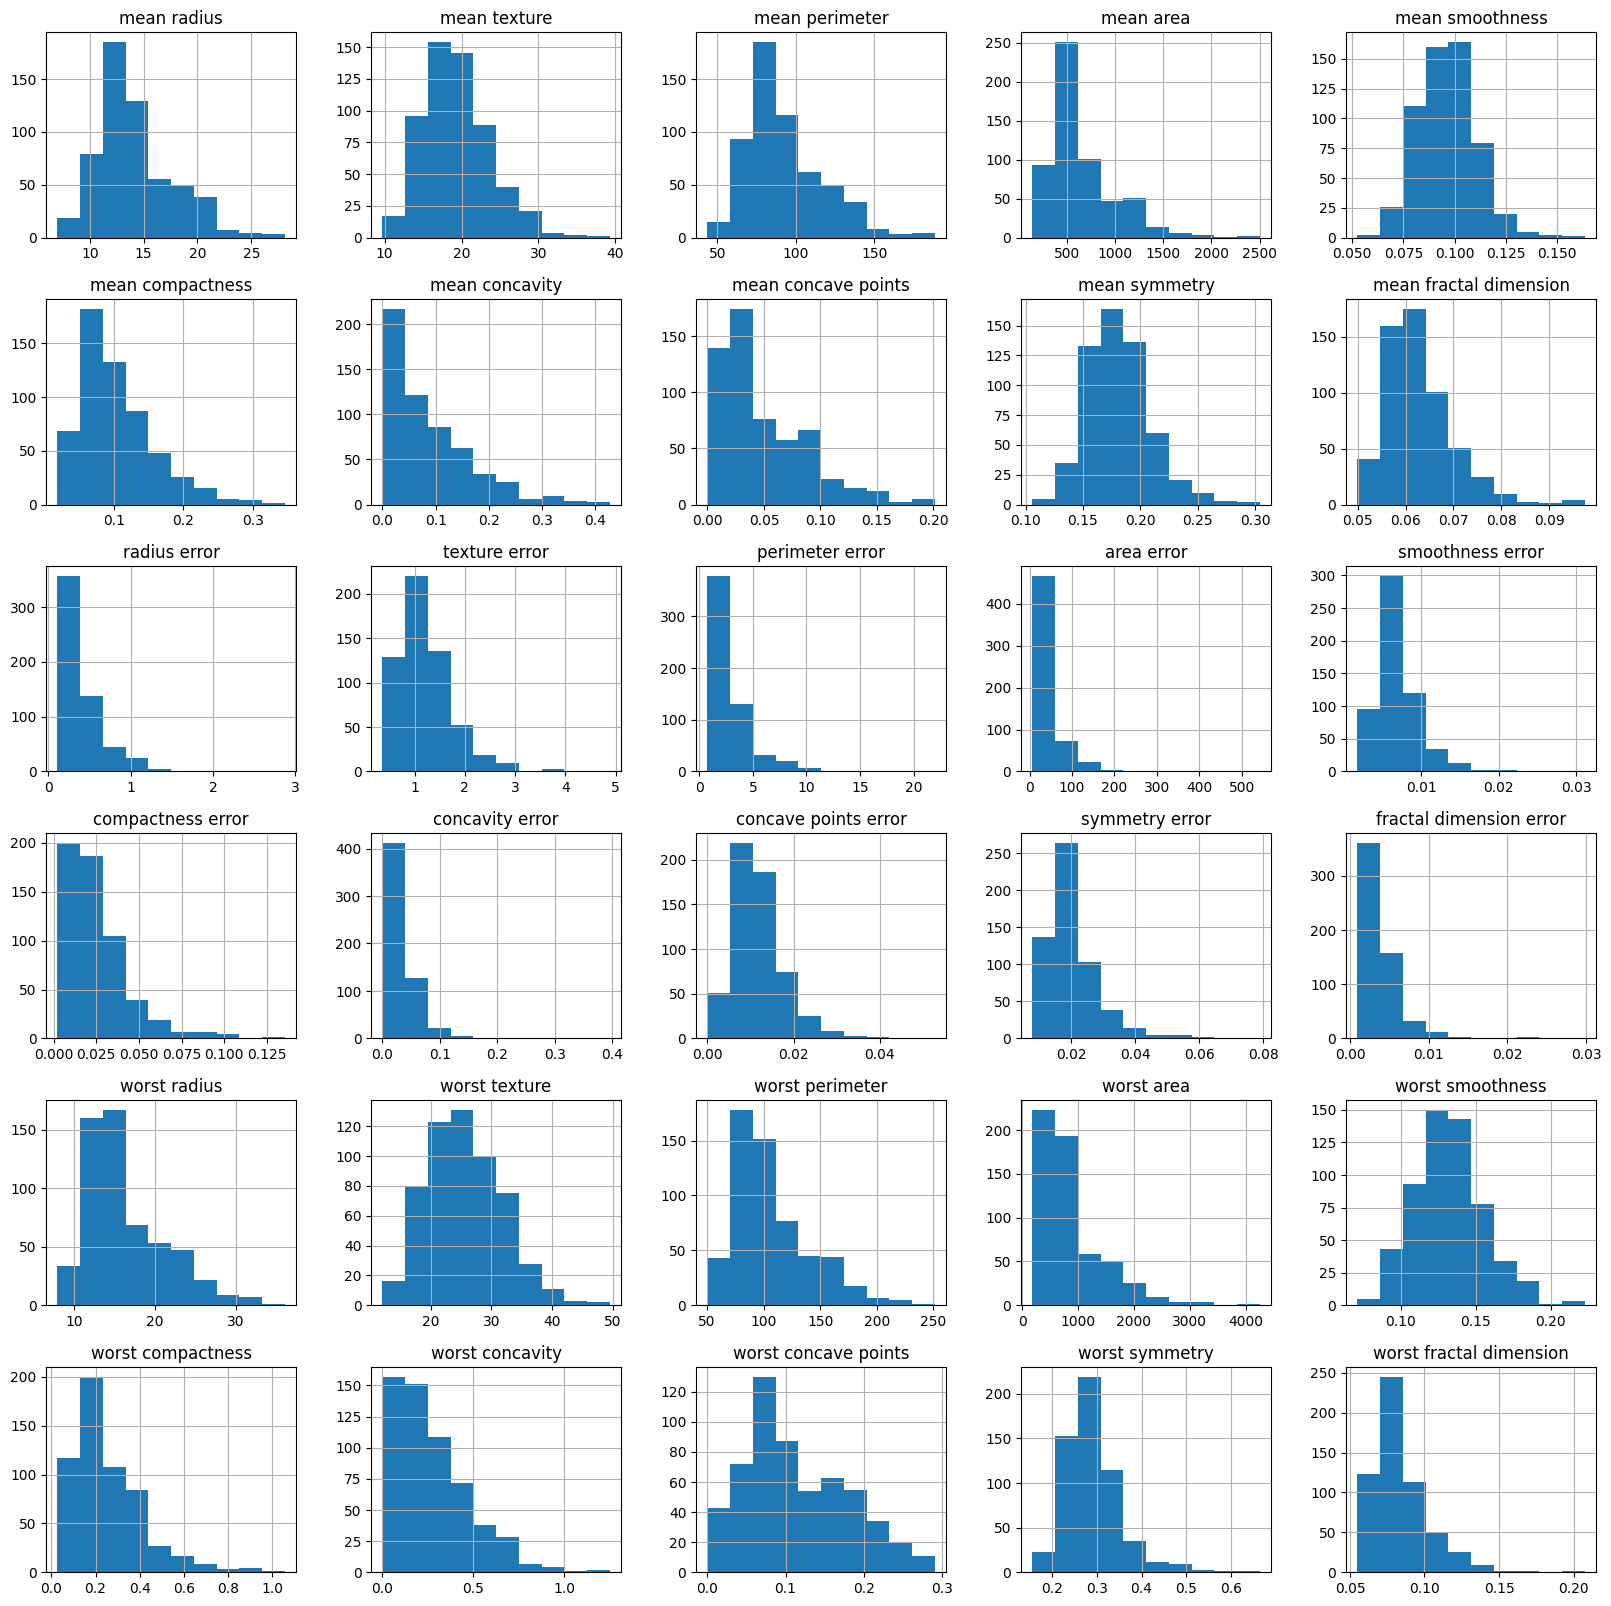

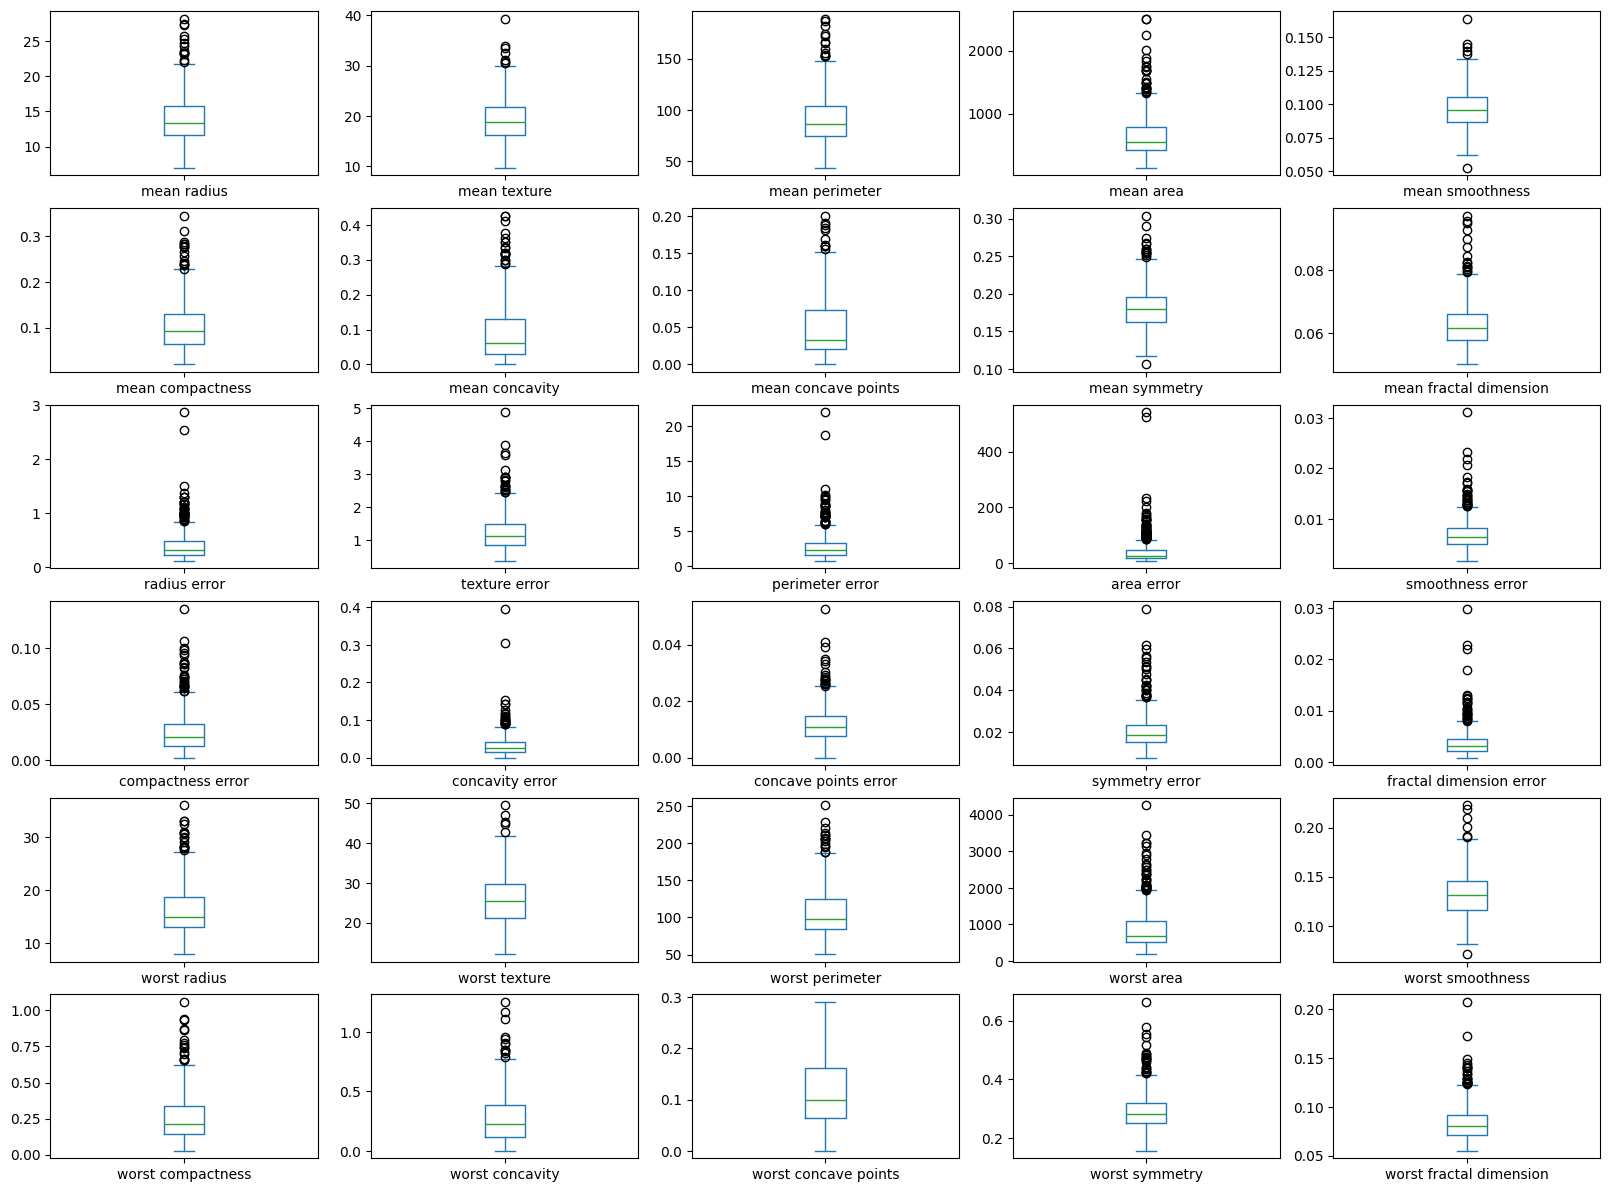

In [ ]:
# Create histograms for individual features
X.hist(figsize=(20, 20))
plt.show()

# Create box plots for individual features
X.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 20))
plt.show()

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

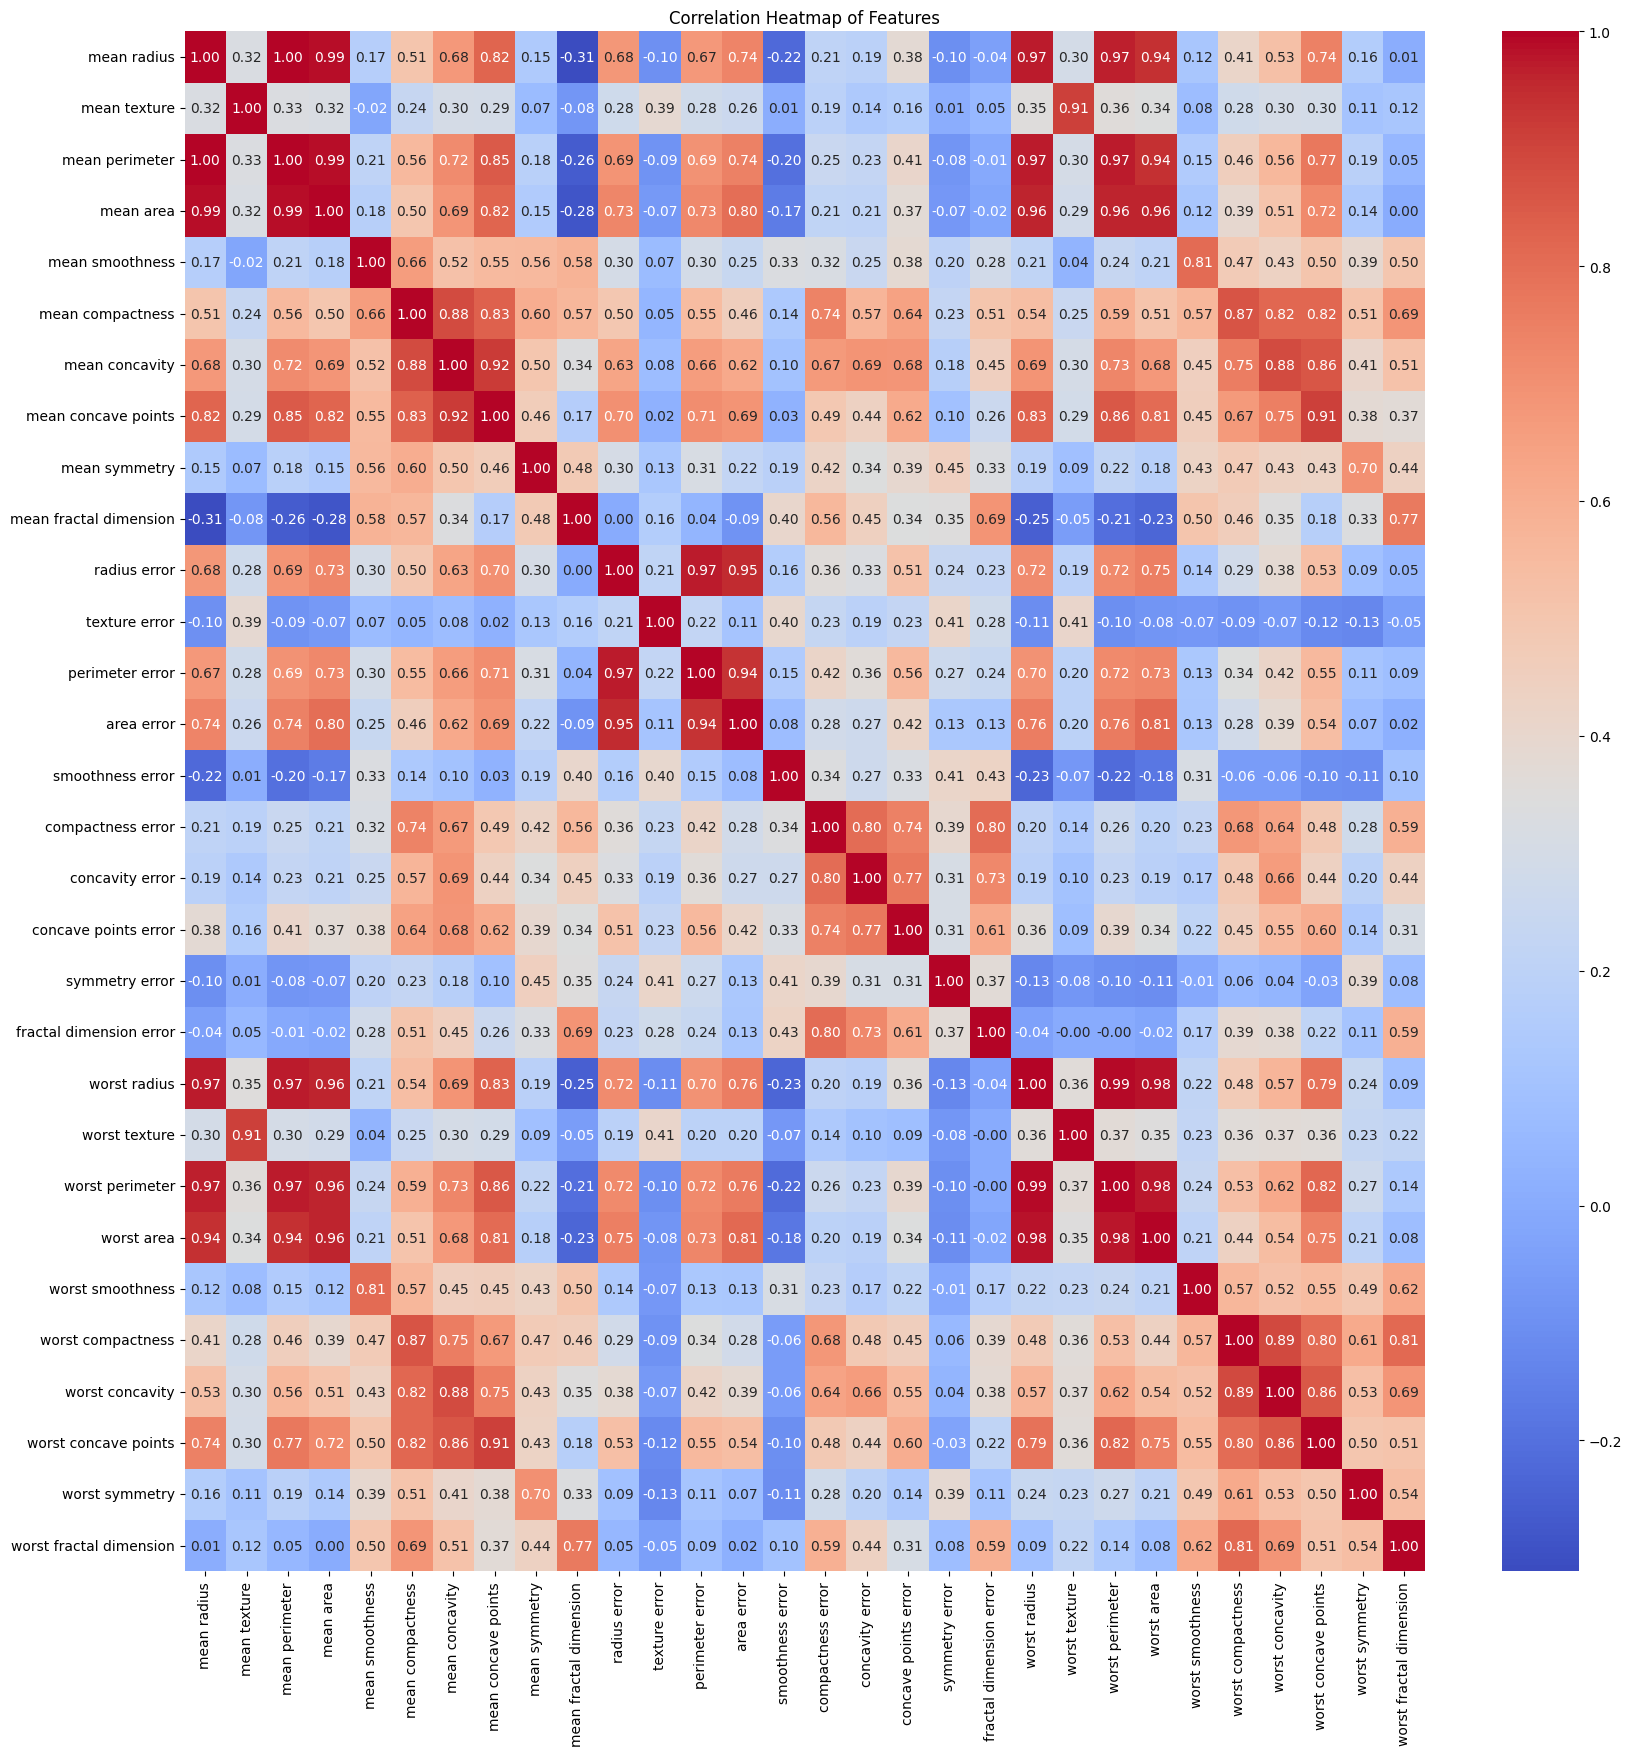

In [ ]:
# Correlation Heatmap of Features.

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

Accuracy: 0.9649
Recall: 0.9859
Precision: 0.9589
F1-Score: 0.9722
Confusion Matrix:
[[40  3]
 [ 1 70]]


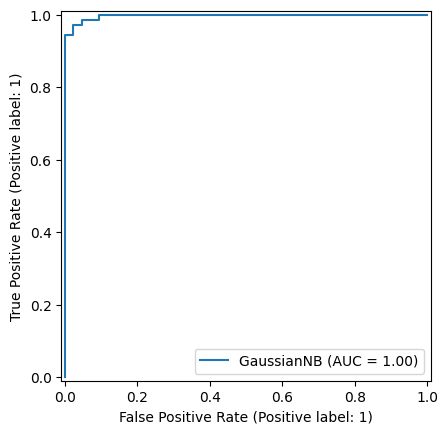

In [ ]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Display the ROC curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

F1-Score: 0.9722


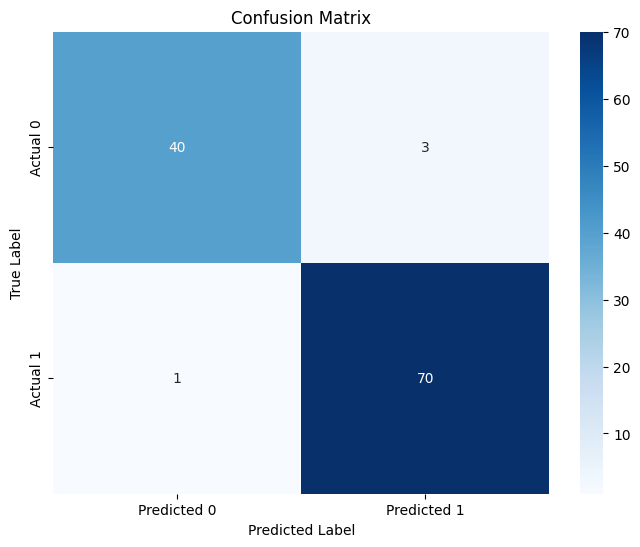

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", # Now 'sns' is defined and can be used
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Get parameters
print(model.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [ ]:
# Define the parameter grid to search
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc')

In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_:.4f}")

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the classification report for the best model
print(classification_report(y_test, y_pred))

# Print the accuracy score for the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the F1 score for the best model
f1_best = f1_score(y_test, y_pred)
print(f"Best Model F1-Score: {f1_best:.4f}")

Best parameters: {'var_smoothing': 0.004328761281083057}
Best ROC AUC score: 0.9861
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9561
Best Model F1-Score: 0.9655


In [ ]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'rbf', 'poly')

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate the SVM model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM F1-Score: {f1_svm:.4f}")

SVM Accuracy: 0.9561
SVM Recall: 0.9577
SVM Precision: 0.9714
SVM F1-Score: 0.9645


SVM Confusion Matrix:
[[41  2]
 [ 3 68]]


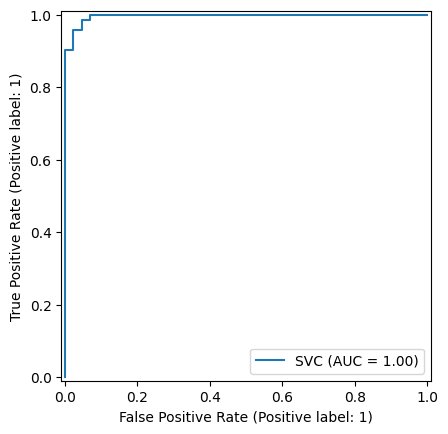

In [ ]:
# Display the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

# Display the ROC curve for SVM
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Calculate and print the F1 score for SVM
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM F1-Score: {f1_svm:.4f}")

SVM F1-Score: 0.9645


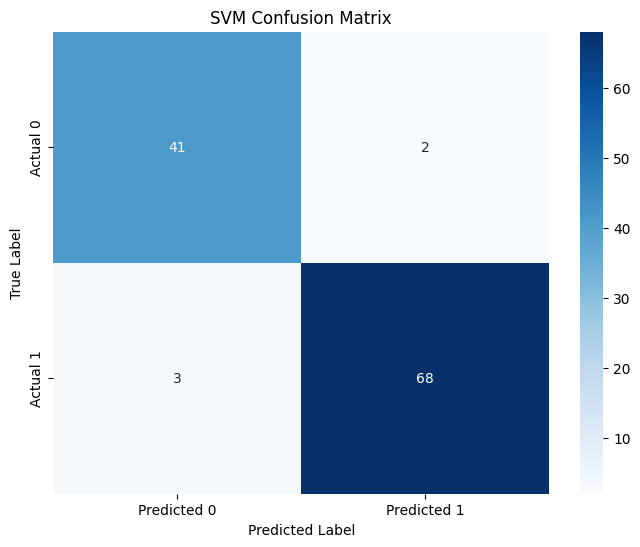

In [ ]:
# Create the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Define the parameter grid to search for SVM
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['linear', 'rbf', 'poly']}

# Create a GridSearchCV object for SVM
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data for SVM
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
print(f"Best SVM parameters: {grid_search_svm.best_params_}")
print(f"Best SVM Accuracy score: {grid_search_svm.best_score_:.4f}")

Best SVM parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best SVM Accuracy score: 0.9736


In [ ]:
# Get the best SVM model from the grid search
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best SVM model on the test set
y_pred_svm_best = best_svm_model.predict(X_test_scaled)

# Print the classification report for the best SVM model
print(classification_report(y_test, y_pred_svm_best))

# Print the accuracy score for the best SVM model
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print(f"Best SVM Model Accuracy: {accuracy_svm_best:.4f}")

# Print the F1 score for the best SVM model
f1_svm_best = f1_score(y_test, y_pred_svm_best)
print(f"Best SVM Model F1-Score: {f1_svm_best:.4f}")

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Best SVM Model Accuracy: 0.9825
Best SVM Model F1-Score: 0.9861


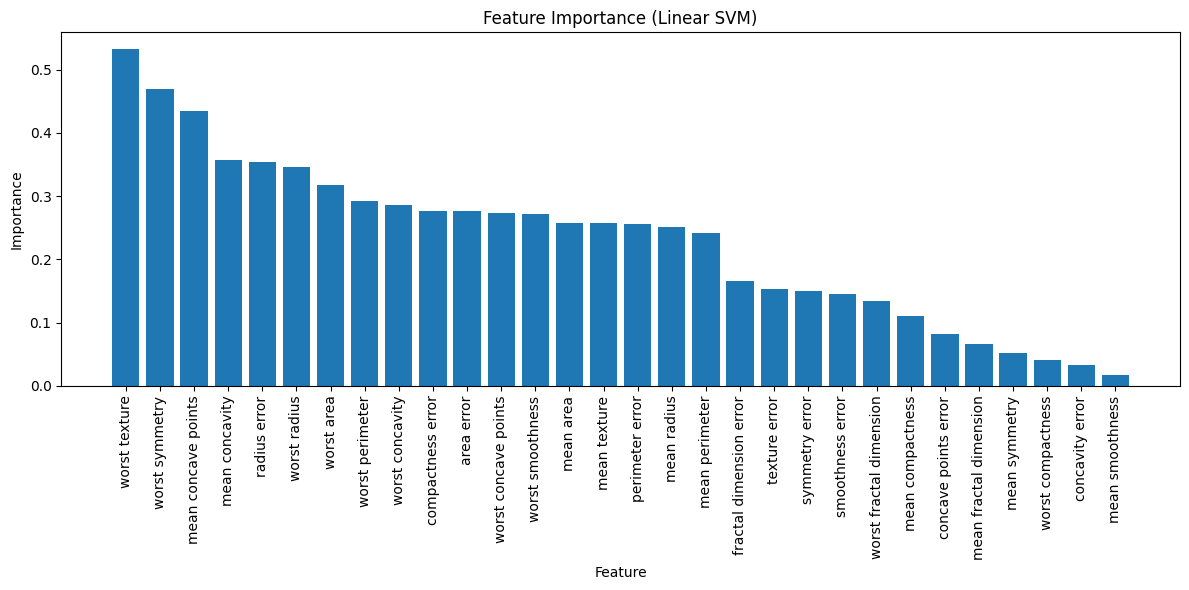

In [ ]:
# 4. Feature Importance :
#    - Bar chart showing the importance of different features in the dataset based on the chosen model (e.g., feature weights in linear SVM).
#    - This helps identify the most relevant features for predicting the target variable.

# Get the feature importances from the linear SVM model
if hasattr(best_svm_model, 'coef_'):
  feature_importances = np.abs(best_svm_model.coef_[0])  # Use absolute values for easier visualization
  feature_names = breast_cancer_data.feature_names

  # Create a DataFrame for easier sorting and plotting
  feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
  feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

  # Create the bar chart
  plt.figure(figsize=(12, 6))
  plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
  plt.xlabel('Feature')
  plt.ylabel('Importance')
  plt.title('Feature Importance (Linear SVM)')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()
else:
  print("Feature importance is not available for this model.")

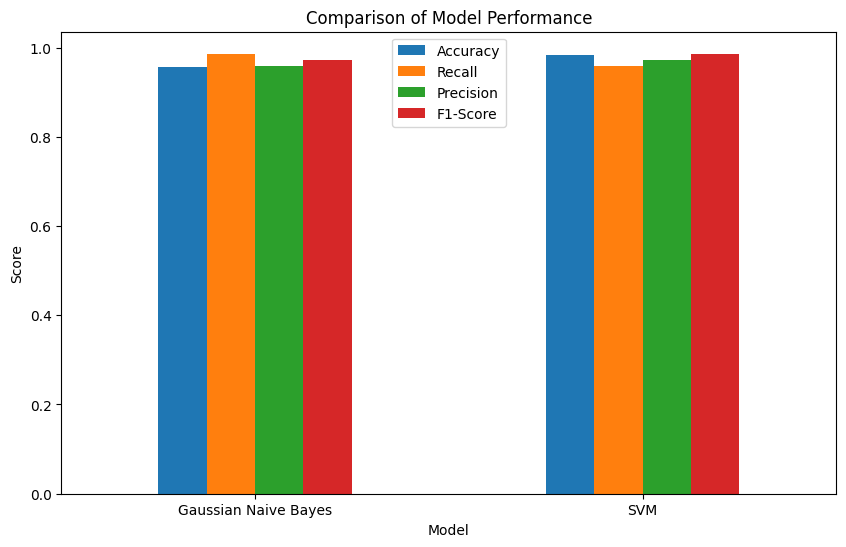

In [ ]:
#1. Comparison of Model Performance:
#    - Bar chart comparing the accuracy, recall, precision, and F1-score of Gaussian Naive Bayes and SVM models.
#    - This plot helps visualize which model performs better overall and in specific metrics.

# Create a dictionary to store the performance metrics for each model
model_performance = {
    'Model': ['Gaussian Naive Bayes', 'SVM'],
    'Accuracy': [accuracy, accuracy_svm_best],
    'Recall': [recall, recall_svm],
    'Precision': [precision, precision_svm],
    'F1-Score': [f1, f1_svm_best]
}

# Convert the dictionary to a Pandas DataFrame
performance_df = pd.DataFrame(model_performance)

# Set the 'Model' column as the index
performance_df = performance_df.set_index('Model')

# Create the bar chart
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.show()

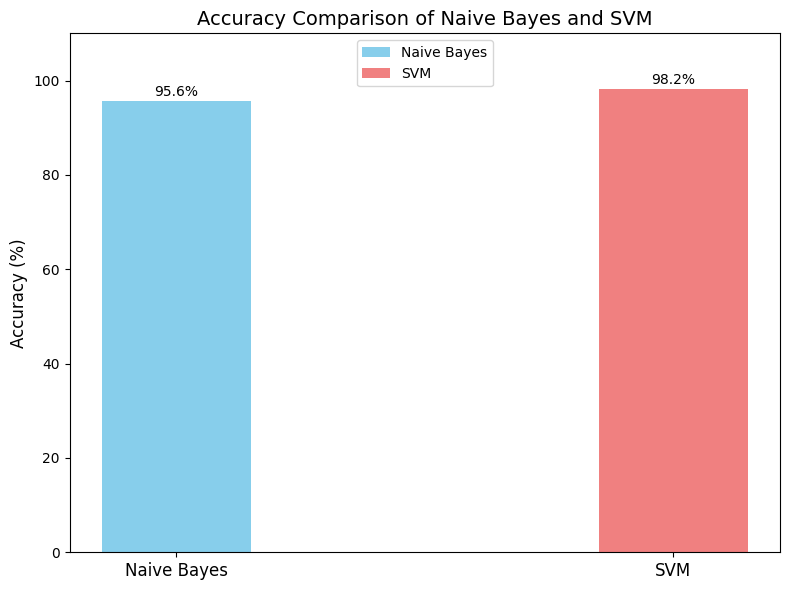

In [ ]:
naive_bayes_accuracy = accuracy * 100  # Convert to percentage
svm_accuracy = accuracy_svm_best * 100 # Convert to percentage

# Model names
models = ['Naive Bayes', 'SVM']

# Create the bar chart with adjustments
plt.figure(figsize=(8, 6))
bar_width = 0.3  # Reduced bar width
index = np.arange(len(models))  # Create an array for x-axis positions

plt.bar(index, [naive_bayes_accuracy, svm_accuracy], bar_width, color=['skyblue', 'lightcoral'], label=['Naive Bayes', 'SVM'])

plt.ylim(0, 110)  # Set y-axis limit for a clear 0-100% scale
plt.ylabel('Accuracy (%)', fontsize=12)  # Increase y-label font size and add %
plt.title('Accuracy Comparison of Naive Bayes and SVM', fontsize=14)  # Increase title font size
plt.xticks(index, models, fontsize=12)  # Set x-axis ticks and labels with increased font size
plt.legend(loc='upper center', fontsize=10) #Adding a legend

# Add accuracy values as text on top of the bars
for i, v in enumerate([naive_bayes_accuracy, svm_accuracy]):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10) #Showing the accuracy with % and adjust vertical position

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

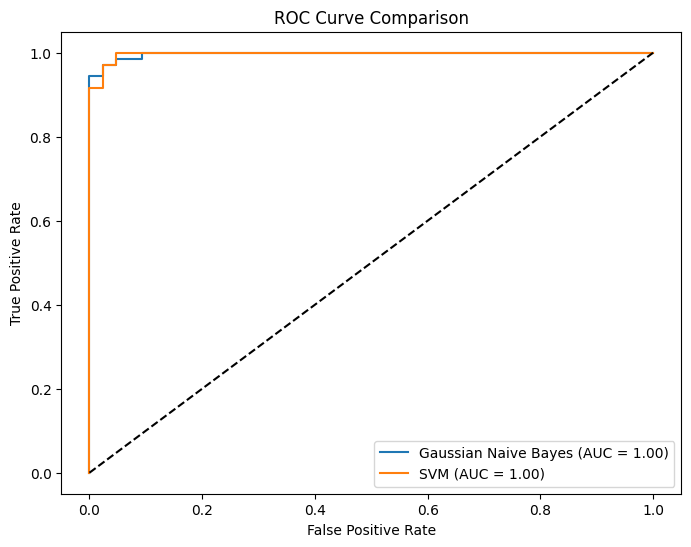

In [ ]:
# 2. ROC Curve Comparison:
# #    - Plot ROC curves for both Gaussian Naive Bayes and SVM models on the same graph.
# #    - This helps compare the models' ability to distinguish between classes and identify the best model for maximizing true positive rate while minimizing false positive rate.


# Get predicted probabilities for both models
y_pred_proba_gnb = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_svm = expit(best_svm_model.decision_function(X_test_scaled))


# Calculate ROC curve for Gaussian Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Calculate ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes (AUC = %0.2f)' % roc_auc_gnb)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

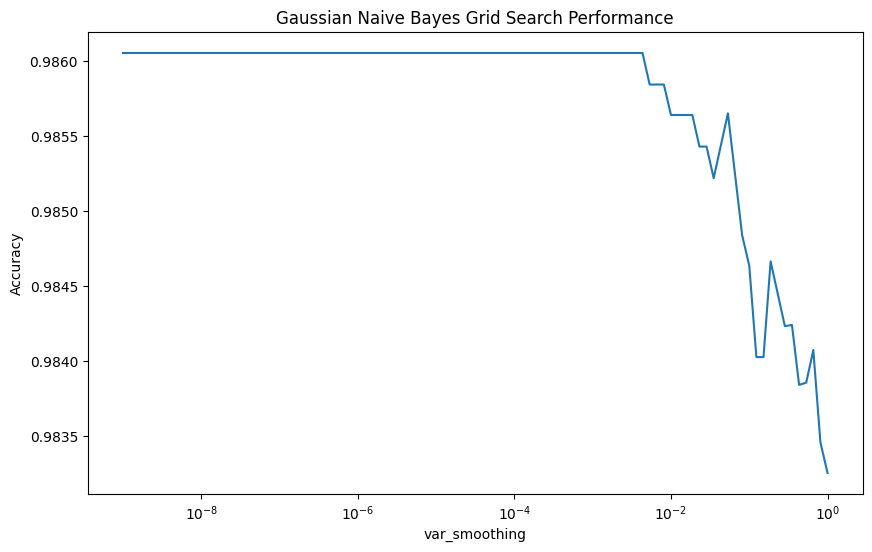

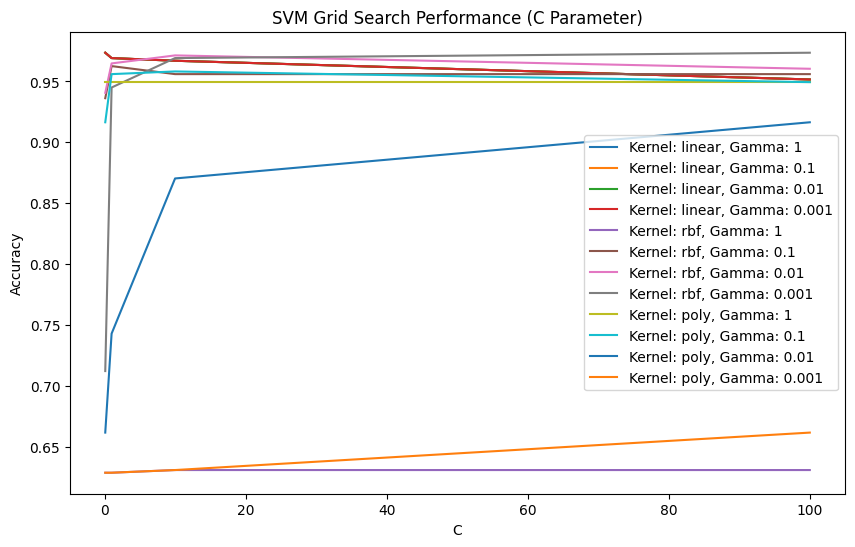

In [ ]:
# 3. Grid Search Performance:
#    - Plot a line chart showing the ROC AUC score or accuracy against different values of 'var_smoothing' for Gaussian Naive Bayes.
#    - This helps identify the optimal value for 'var_smoothing' that yields the best performance.
#    - Similarly, for SVM, plot a line chart showing accuracy against different values of 'C', 'gamma', and 'kernel' for SVM.
#    - This allows you to visualize how different hyperparameter combinations affect SVM model performance.

# Gaussian Naive Bayes Grid Search Performance
plt.figure(figsize=(10, 6))
# Access 'mean_test_score' instead of 'mean_test_roc_auc' because ROC AUC was likely not used as the scoring metric
plt.plot(param_grid['var_smoothing'], grid_search.cv_results_['mean_test_score'])
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy') # Changed ylabel to Accuracy
plt.title('Gaussian Naive Bayes Grid Search Performance')
plt.xscale('log')  # Use a logarithmic scale for 'var_smoothing'
plt.show()

# SVM Grid Search Performance (for 'C' parameter)
plt.figure(figsize=(10, 6))
for kernel in ['linear', 'rbf', 'poly']:  # Iterate through different kernels
  for gamma in [1, 0.1, 0.01, 0.001]:  # Iterate through different gamma values
    mean_scores = []
    for c_value in param_grid_svm['C']:
      # Access 'mean_test_score' which is the default if no specific scoring is provided to GridSearchCV
      scores = grid_search_svm.cv_results_['mean_test_score'][
          (grid_search_svm.cv_results_['param_kernel'] == kernel) &
          (grid_search_svm.cv_results_['param_gamma'] == gamma) &
          (grid_search_svm.cv_results_['param_C'] == c_value)
      ]
      if len(scores) > 0:
        mean_scores.append(scores[0])
    if len(mean_scores) > 0:
      plt.plot(param_grid_svm['C'], mean_scores, label=f'Kernel: {kernel}, Gamma: {gamma}')


plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM Grid Search Performance (C Parameter)')
plt.legend()
plt.show()